<a href="https://colab.research.google.com/github/saniagonsalves/DM_Short_Story/blob/main/Sania_DM_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name- Sania Gonsalves**

Veracity Factor- Sentiment Analysis

Micro Factors
1. Positive
2. Negative
3. Neutral
4. User satisfaction of product

* Sentiment Analysis is done by classifying the positive tweets from negative 
tweets by machine learning models for classification, text mining, text analysis, data analysis and data visualization
* Tweets from the Twitter website and dataset obtained by scrapping politifact website are preprocessed and classified based on their emotional content as **positive**, **negative** and **neutral**; and analyses the performance of various classifying algorithms based on their precision
* With the proposed method in paper 2, it is possible to predict **user satisfaction of a product**,happiness with some particular environment or neutral reviews for products



Paper links-

1) https://www.sciencedirect.com/science/article/pii/S1877050917312103

2) https://www.researchgate.net/publication/261480716_Opinion_mining_and_sentiment_analysis_on_a_Twitter_data_stream

Google Drive link-

https://drive.google.com/drive/folders/1QlTWu0FycaLQLuhJU6e5-tSbPZ-x_C1z?usp=sharing


Datasets link-

https://drive.google.com/drive/folders/18u7M2QJAaFavtpr_PjoLei5gqCgN_Uyq?usp=sharing




**To ingest a streaming input(twitter)**

In [ ]:
!pip install tweepy

In [ ]:
!pip install textblob
!pip install credentials

In [ ]:
import tweepy
import pandas as pd
import numpy as np

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Twitter App access keys for users

In [ ]:
CONSUMER_KEY= '1CuLbkKNE0WaJ7Ai3PG6cMr7d'
CONSUMER_SECRET= 'cg4RSp91giWTcYUkSYCD5VeNvQlbv7h6FxgETwggfEV6BSn96J'

ACCESS_TOKEN= '154487460-GI5eD2glPHsLOkn84OZxPJZ0cevxKYsLl2xVgTBB'
ACCESS_SECRET= 'dNmhWhBadMDDchVAcYGYGKfpl3Aq5SOR4mtQDQYTwoMzc'

Authentication and access using keys

In [ ]:
from credentials import *
def twitter_setup():
 auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
 auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

 api= tweepy.API(auth)
 return api


Create a tweet list and print the most recent tweets

In [ ]:
extractor= twitter_setup()
tweets= extractor.user_timeline(screen_name="SanFrancisco", count=500)
print("tweets extracted are: {} .\n".format(len(tweets)))

print("10 recent tweets:\n")
for tweet in tweets[:10]:
  print(tweet.text)
  print()

tweets extracted are: 200 .

10 recent tweets:

I just downloaded let's play shadowgraphs by incorrigible https://t.co/t1rqF4t3Qi #indiegames via @itchio

4.0 earthquake, 9 km ENE of Gilroy, California. 2021-02-22 01:38:13 UTC at epicenter (1m ago, depth 8km). https://t.co/GMxDv0fBLE

4.1 earthquake, 9km NE of Morgan Hill, CA. 2020-01-01 23:16:31 at epicenter (4m ago, depth 5.9km). https://t.co/VWMYRwJR6t

3.4 earthquake, 0km ESE of Pleasant Hill, CA. 2019-10-15 18:11:58 at epicenter (4m ago, depth 15km). https://t.co/MQQGJybNU9

5.0 earthquake, 16km SSE of Tres Pinos, CA. 2019-10-15 11:42:30 at epicenter (4m ago, depth 9.7km). https://t.co/h7u729P05g

4.5 earthquake, 0km ENE of Waldon, California. 2019-10-14 21:33:43 at epicenter (4m ago, depth 6km). https://t.co/tSS9dGJJ7v

4.4 earthquake, 12km E of Blackhawk, CA. 2019-07-16 12:11:01 at epicenter (5m ago, depth 12km). https://t.co/9VQTer5So3

Revised (6.9 -&gt; 7.1): 7.1 earthquake, 17km NNE of Ridgecrest, CA. 2019-07-05 19:19:52 at 

In [ ]:
data= pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])
display(data.head(10))

,tweets
0,I just downloaded let's play shadowgraphs by i...
1,"4.0 earthquake, 9 km ENE of Gilroy, California..."
2,"4.1 earthquake, 9km NE of Morgan Hill, CA. 202..."
3,"3.4 earthquake, 0km ESE of Pleasant Hill, CA. ..."
4,"5.0 earthquake, 16km SSE of Tres Pinos, CA. 20..."
5,"4.5 earthquake, 0km ENE of Waldon, California...."
6,"4.4 earthquake, 12km E of Blackhawk, CA. 2019-..."
7,"Revised (6.9 -&gt; 7.1): 7.1 earthquake, 17km ..."
8,current weather in San Francisco: broken cloud...
9,current weather in San Francisco: broken cloud...


In [ ]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [ ]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1459152663719952396
2021-11-12 13:34:39
Twitter Web App
0
None
None
{'hashtags': [{'text': 'indiegames', 'indices': [82, 93]}], 'symbols': [], 'user_mentions': [{'screen_name': 'itchio', 'name': 'itch.io', 'id': 445189971, 'id_str': '445189971', 'indices': [98, 105]}], 'urls': [{'url': 'https://t.co/t1rqF4t3Qi', 'expanded_url': 'https://incorrigible.itch.io/shadowgraphs', 'display_url': 'incorrigible.itch.io/shadowgraphs', 'indices': [58, 81]}]}


In [ ]:
data['len']= np.array([len(tweet.text) for tweet in tweets])
data['ID']= np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source']= np.array([tweet.source for tweet in tweets])
data['BinaryNumTarget']= np.array([tweet.retweet_count for tweet in tweets])

In [ ]:
display(data.head(10))

,tweets,len,ID,Date,Source,BinaryNumTarget
0,I just downloaded let's play shadowgraphs by i...,105,1459152663719952396,2021-11-12 13:34:39,Twitter Web App,0
1,"4.0 earthquake, 9 km ENE of Gilroy, California...",129,1363664818503262208,2021-02-22 01:40:03,San Francisco Warnings,1
2,"4.1 earthquake, 9km NE of Morgan Hill, CA. 202...",122,1212634783508910080,2020-01-02 07:20:36,San Francisco Warnings,2
3,"3.4 earthquake, 0km ESE of Pleasant Hill, CA. ...",124,1184291713067601920,2019-10-16 02:15:22,San Francisco Warnings,2
4,"5.0 earthquake, 16km SSE of Tres Pinos, CA. 20...",123,1184193855261790208,2019-10-15 19:46:31,San Francisco Warnings,1
5,"4.5 earthquake, 0km ENE of Waldon, California....",124,1183980156588716032,2019-10-15 05:37:21,San Francisco Warnings,4
6,"4.4 earthquake, 12km E of Blackhawk, CA. 2019-...",119,1151223974396755968,2019-07-16 20:15:58,San Francisco Warnings,2
7,"Revised (6.9 -&gt; 7.1): 7.1 earthquake, 17km ...",142,1147350491988287488,2019-07-06 03:44:08,San Francisco Warnings,1
8,current weather in San Francisco: broken cloud...,95,1138290764658532352,2019-06-11 03:44:01,San Francisco Warnings,1
9,current weather in San Francisco: broken cloud...,94,1138177641758875659,2019-06-10 20:14:30,San Francisco Warnings,2


In [ ]:
#store the data to a csv file
data.to_csv('twitter_data.csv')

In [ ]:
df=pd.read_csv('/content/twitter_data.csv')
df.head(5)

,Unnamed: 0,tweets,len,ID,Date,Source,BinaryNumTarget
0,0,I just downloaded let's play shadowgraphs by i...,105,1459152663719952396,2021-11-12 13:34:39,Twitter Web App,0
1,1,"4.0 earthquake, 9 km ENE of Gilroy, California...",129,1363664818503262208,2021-02-22 01:40:03,San Francisco Warnings,1
2,2,"4.1 earthquake, 9km NE of Morgan Hill, CA. 202...",122,1212634783508910080,2020-01-02 07:20:36,San Francisco Warnings,2
3,3,"3.4 earthquake, 0km ESE of Pleasant Hill, CA. ...",124,1184291713067601920,2019-10-16 02:15:22,San Francisco Warnings,2
4,4,"5.0 earthquake, 16km SSE of Tres Pinos, CA. 20...",123,1184193855261790208,2019-10-15 19:46:31,San Francisco Warnings,1


In [ ]:
dist=list(df.BinaryNumTarget)
pp=[0,0,0]
for i in dist:
    if i==-1:
        pp[0]+=1
    elif i==0:
        pp[1]+=1
    else:
        pp[2]+=1
print(pp)

[0, 148, 52]


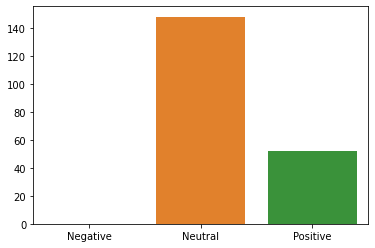

In [ ]:
labels=['Negative','Neutral','Positive']
sns.barplot(x=labels,y=pp)
plt.show()

In [ ]:
comment=list(df.tweets.astype(str))
sentiment=list(df.BinaryNumTarget)
twitter_dict=dict(zip(comment,sentiment))

In [ ]:
print(list(twitter_dict.items())[:5])

[("I just downloaded let's play shadowgraphs by incorrigible https://t.co/t1rqF4t3Qi #indiegames via @itchio", 0), ('4.0 earthquake, 9 km ENE of Gilroy, California. 2021-02-22 01:38:13 UTC at epicenter (1m ago, depth 8km). https://t.co/GMxDv0fBLE', 1), ('4.1 earthquake, 9km NE of Morgan Hill, CA. 2020-01-01 23:16:31 at epicenter (4m ago, depth 5.9km). https://t.co/VWMYRwJR6t', 2), ('3.4 earthquake, 0km ESE of Pleasant Hill, CA. 2019-10-15 18:11:58 at epicenter (4m ago, depth 15km). https://t.co/MQQGJybNU9', 2), ('5.0 earthquake, 16km SSE of Tres Pinos, CA. 2019-10-15 11:42:30 at epicenter (4m ago, depth 9.7km). https://t.co/h7u729P05g', 1)]


In [ ]:
Neg_list=[]
Pos_list=[]
Neutral_list=[]
for i,j in twitter_dict.items():
    if j==-1:
        Neg_list.append(i)
    elif j==0:
        Neutral_list.append(i)
    else:
        Pos_list.append(i) 

In [ ]:
print(Neg_list[:2],'\n',Neutral_list[:2],'\n',Pos_list[:2])

[] 
 ["I just downloaded let's play shadowgraphs by incorrigible https://t.co/t1rqF4t3Qi #indiegames via @itchio", 'current weather in San Francisco: overcast clouds, 51°F\n87% humidity, wind 18mph, pressure 1010mb'] 
 ['4.0 earthquake, 9 km ENE of Gilroy, California. 2021-02-22 01:38:13 UTC at epicenter (1m ago, depth 8km). https://t.co/GMxDv0fBLE', '4.1 earthquake, 9km NE of Morgan Hill, CA. 2020-01-01 23:16:31 at epicenter (4m ago, depth 5.9km). https://t.co/VWMYRwJR6t']


In [ ]:
pos_len=[]
for i in Pos_list:
    pos_len.append(len(i))

In [ ]:
neg_len=[]
for i in Neg_list:
    neg_len.append(len(i))

In [ ]:
Neutral_len=[]
for i in Neutral_list:
    Neutral_len.append(len(i))

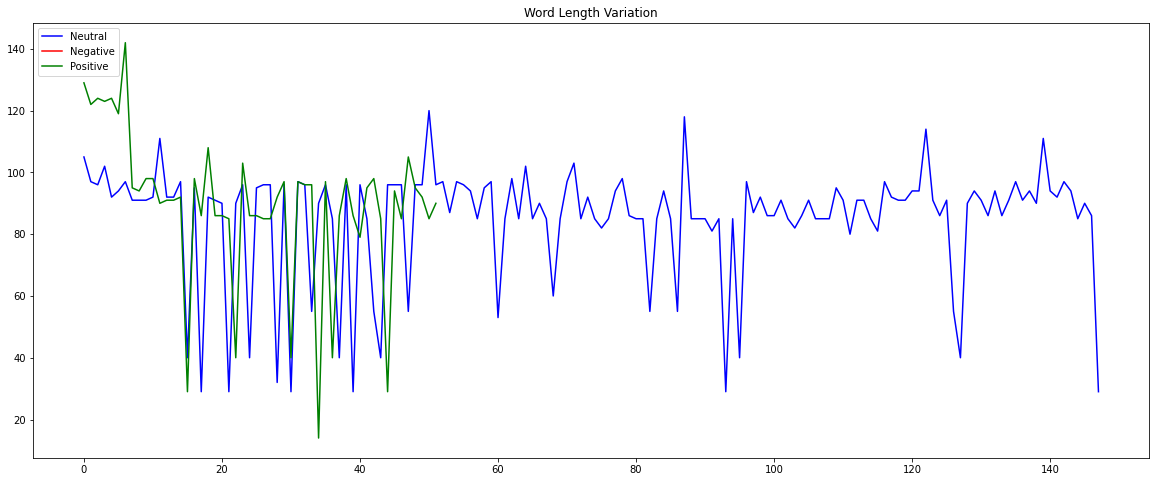

In [ ]:
plt.subplots(figsize=(20,8))
plt.title("Word Length Variation")
plt.plot(Neutral_len[:250],c='b',label='Neutral')
plt.plot(neg_len[:250],c='r',label='Negative')
plt.plot(pos_len[:250],c='g',label='Positive')
plt.legend(loc='upper left')
plt.show()

In [ ]:
pos_mean=sum(pos_len)//len(pos_len)
#neg_mean=sum(neg_len)//len(neg_len)
neutral_mean=sum(Neutral_len)//len(Neutral_len)
combined_mean=(sum(pos_len)+sum(neg_len)+sum(Neutral_len))//(len(pos_len)+len(neg_len)+len(Neutral_len))

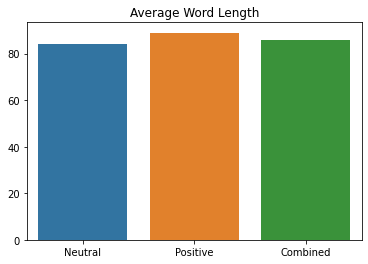

In [ ]:
plt.title("Average Word Length")
sns.barplot(x=['Neutral','Positive','Combined'],y=[neutral_mean,pos_mean,combined_mean])
plt.show()

In [ ]:
train_df1 = pd.read_csv('/content/train_tweet.csv')
test_df2 = pd.read_csv('/content/test_tweets.csv')

print(train_df1.shape)
print(test_df2.shape)

(31962, 3)
(17197, 2)


In [ ]:
train_df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
test_df2.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
train_df1.isnull().any()
test_df2.isnull().any()

id       False
tweet    False
dtype: bool

In [ ]:
# checking out the negative comments from the train set
train_df1[train_df1['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
# checking out the postive comments from the train set 
train_df1[train_df1['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


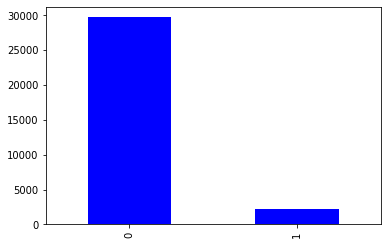

In [ ]:
train_df1['label'].value_counts().plot.bar(color = 'blue', figsize = (6, 4))

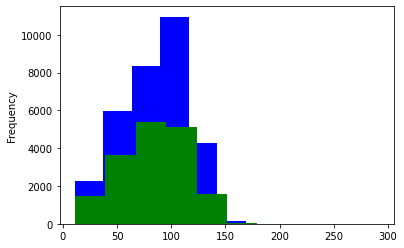

In [ ]:
# checking the distribution of tweets in the data
length_train = train_df1['tweet'].str.len().plot.hist(color = 'blue', figsize = (6, 4))
length_test = test_df2['tweet'].str.len().plot.hist(color = 'green', figsize = (6, 4))

In [ ]:
# adding a column to represent the length of the tweet
train_df1['len'] = train_df1['tweet'].str.len()
test_df2['len'] = test_df2['tweet'].str.len()

train_df1.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [ ]:
train_df1.groupby('label').describe()

id                                   ...   len                    
         count          mean          std   min  ...   25%   50%    75%    max
label                                            ...                          
0      29720.0  15974.454441  9223.783469   1.0  ...  62.0  88.0  107.0  274.0
1       2242.0  16074.896075  9267.955758  14.0  ...  69.0  96.0  111.0  152.0

[2 rows x 16 columns]

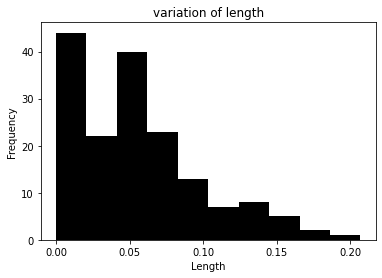

In [ ]:
train_df1.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

To count most frequently occuring words

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

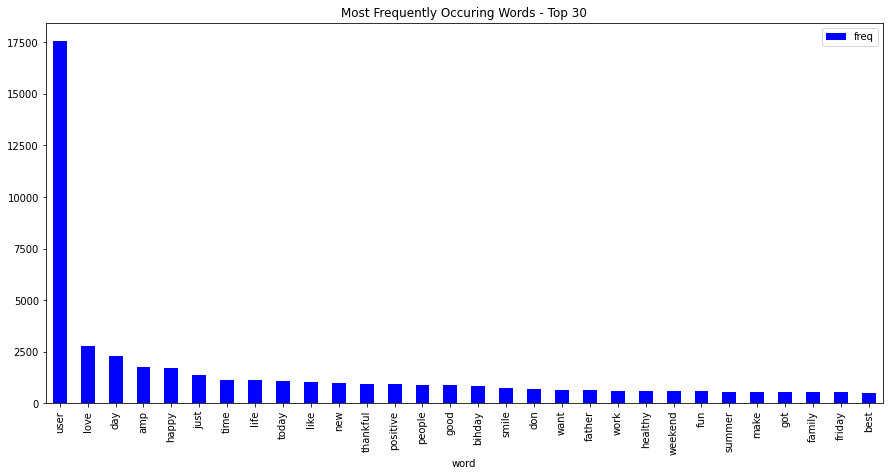

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_df1.tweet)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

**WordCloud to represent most used words**

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

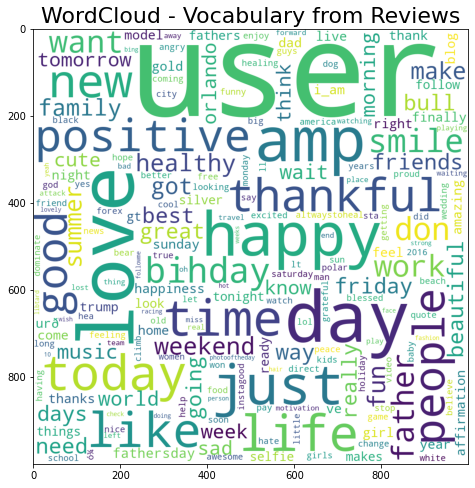

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

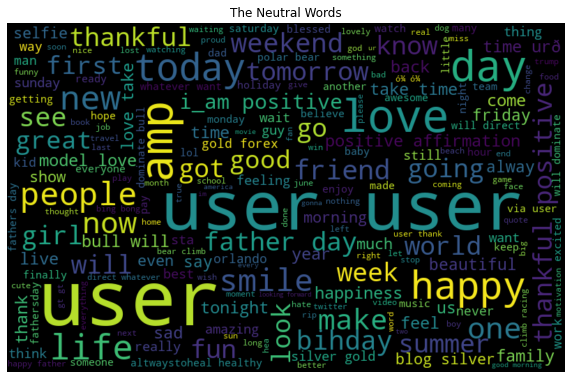

In [ ]:
normal_words =' '.join([text for text in train_df1['tweet'][train_df1['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

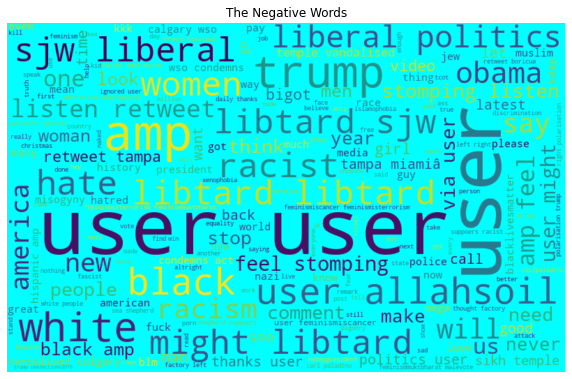

In [ ]:
negative_words =' '.join([text for text in train_df1['tweet'][train_df1['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [ ]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
import re

def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)

In [ ]:
# extracting hashtags from non racist tweets
HT_regular = hashtag_extract(train_df1['tweet'][train_df1['label'] == 0])

# extracting hashtags from racist tweets
HT_negative = hashtag_extract(train_df1['tweet'][train_df1['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [ ]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

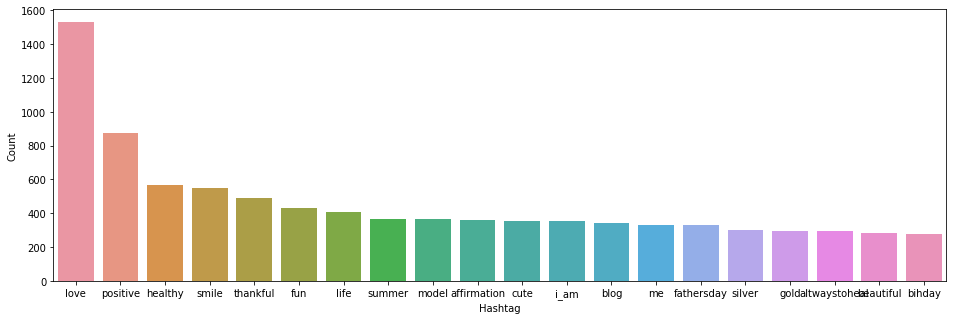

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

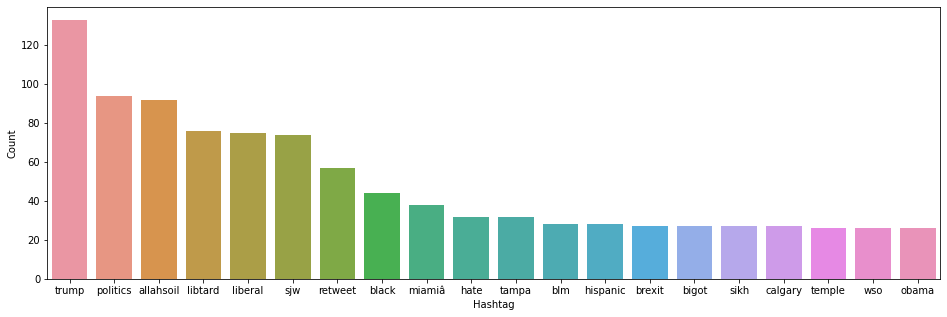

In [ ]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


[LabeledSentence(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandn

In [ ]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train_df1['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [ ]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test_df2['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train_df1.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [ ]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9515705168314353
F1 score : 0.6110552763819096
[[7300  132]
 [ 255  304]]


In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
f1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


**With an additional micro-factor proposed in paper 2, it is possible to predict user satisfaction of a product,happiness with some particular environment or neutral reviews for products**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#plt.style.use('ggplot')
import re
import nltk
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

load the dataset

In [ ]:
data = pd.read_csv('/content/Reviews.csv')

In [ ]:
print(data.shape)
data.head(3)

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
# for all data is too heavy, make it slim by chose
df2 = data.sample(frac= 0.20,replace = True).reset_index(drop = True)

print(df2.shape)
df2.head()

(113691, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,57527,B001D3LV5Q,A3F4SMKGPRX4PR,"Edward Branch Jr. ""BlackJack""",2,2,4,1257033600,Refreshing Gum,I buy this gum for my sister. She says it help...
1,93330,B007TGDXMU,A3D7BA2K8F8XGZ,H. McCubbin,1,2,5,1342483200,Cheap AND Tasty!,This caught my eye because of the price; it's ...
2,268178,B000FKD142,A1DJHJ98I0PJCF,Ami Hileman,0,0,1,1343520000,item not as pictured,"This item is actually ""Light Italian"" dressing..."
3,167400,B007PE7ANY,A17D8RDGKBZ5TX,John W. Loftus,2,3,5,1340841600,"A Pretty Good Snack, Healthy and Nutritious",There's nothing artificial in these all natura...
4,82487,B0002AQ23W,A34RLKZNFIYR2E,"Mocha Girl ""Sayuri""",0,0,5,1240185600,The best bone,This is my dogs favorite bone. She is a Shiba...


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113691 entries, 0 to 113690
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      113691 non-null  int64 
 1   ProductId               113691 non-null  object
 2   UserId                  113691 non-null  object
 3   ProfileName             113688 non-null  object
 4   HelpfulnessNumerator    113691 non-null  int64 
 5   HelpfulnessDenominator  113691 non-null  int64 
 6   Score                   113691 non-null  int64 
 7   Time                    113691 non-null  int64 
 8   Summary                 113686 non-null  object
 9   Text                    113691 non-null  object
dtypes: int64(5), object(5)
memory usage: 8.7+ MB


In [ ]:
print(df2.isna().sum())
df2.dropna(inplace= True)
df2.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               3
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   5
Text                      0
dtype: int64


Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

**To find the distribution of ratings across dataset**

In [ ]:
print(df2['Score'].value_counts())
rating_pct = df2['Score'].value_counts()/len(df) * 100
rating_pct

5    72482
4    16177
1    10505
3     8587
2     5932
Name: Score, dtype: int64


5    12.750724
4     2.845789
1     1.847995
3     1.510588
2     1.043532
Name: Score, dtype: float64

**Plot distributoin review(score)**

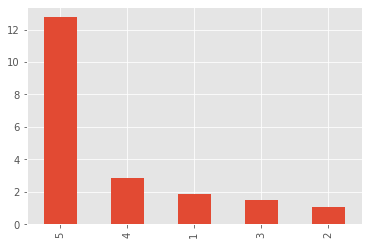

In [ ]:
rating_pct.plot.bar()
plt.show()

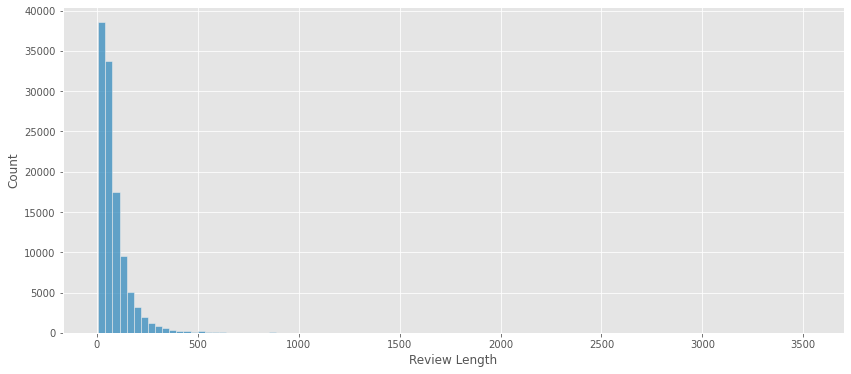

In [ ]:
#words per review
plt.figure(figsize = (14,6))
WordsPerReview = df2['Text'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

**Word cloud**

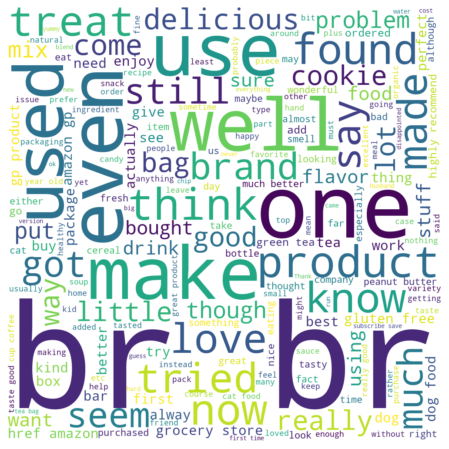

In [ ]:
# all review joint into 1 sentence
txt = ' '.join(review for review in df2.Text)

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 800,
            max_words = 200,
            width = 1000,
            height = 1000
            ).generate(txt)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

Data Preprocessing and Transformation

In [ ]:
df2 = pd.DataFrame(df2,columns = ['Score','Text'])
df2.rename(columns = {'Score':'Rating','Text':'Review'},inplace = True)

In [ ]:
def apply_sentiment(Rating):
    if(Rating <=2 ):
        return 0
    else:
        return 1

In [ ]:
df2['Sentiment'] = df2['Rating'].apply(apply_sentiment)
df2.drop(['Rating'],axis = 1, inplace = True)

In [ ]:
sentiment = df2['Sentiment'].value_counts()
sentiment

1    97246
0    16437
Name: Sentiment, dtype: int64

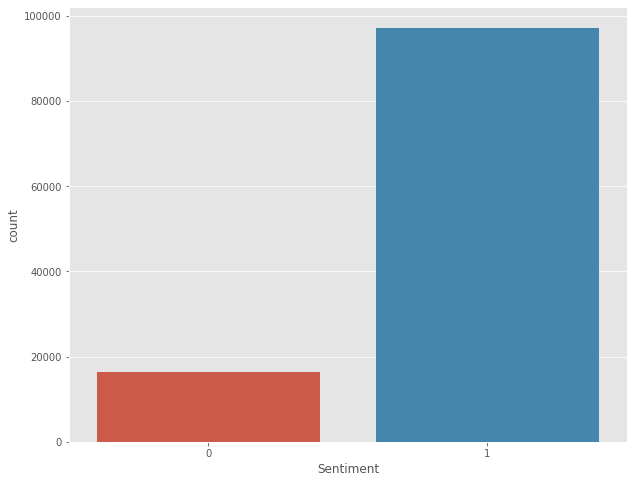

In [ ]:
plt.figure(figsize = ( 10,8))
sns.countplot(data = df2, x = 'Sentiment')
plt.show()

In [ ]:
def clean_text(Review):
   
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review) 
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

In [ ]:
df2['Review']

0         I buy this gum for my sister. She says it help...
1         This caught my eye because of the price; it's ...
2         This item is actually "Light Italian" dressing...
3         There's nothing artificial in these all natura...
4         This is my dogs favorite bone.  She is a Shiba...
                                ...                        
113686    Our family LOVES these Cornuts! Delicious, fre...
113687    I read the reviews and was so hopeful. Im sorr...
113688    COSTCO used to carry the ice cream flavored Ch...
113689    We enjoy Green Mountain Coffee Nantucket Blend...
113690    I've been partial to Emerald's products so my ...
Name: Review, Length: 113683, dtype: object

In [ ]:
df2['Review'] = df2['Review'].apply(clean_text)

In [ ]:
df2.head()

,Review,Sentiment
0,i buy this gum for my sister she says it helps...,1
1,this caught my eye because of the price its at...,1
2,this item is actually light italian dressing a...,0
3,theres nothing artificial in these all natural...,1
4,this is my dogs favorite bone she is a shiba ...,1


In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopword = []
sentence = df2['Review'][0]


#words = nltk.word_tokenize(sentence)


def remove_stopword(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

df2['reviews_text'] = df2['Review'].apply(lambda row: remove_stopword(stop_words, row))

## need to convert list into string
df2['reviews_text'] = df2['reviews_text'].apply(lambda row: ','.join(row))

In [ ]:
df2.head(3)

,Review,Sentiment,reviews_text
0,i buy this gum for my sister she says it helps...,1,"buy,gum,sister,says,helps,breathe,better,chews..."
1,this caught my eye because of the price its at...,1,"caught,eye,price,least,cheaper,green,mountains..."
2,this item is actually light italian dressing a...,0,"item,actually,light,italian,dressing,nothing,l..."


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [ ]:
X = df2['reviews_text']
y = df2['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((90946,), (22737,), (90946,))

In [ ]:
fit_model = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('Training accuracy:', fit_model.score(X_train,y_train))
print('Test accuracy:', fit_model.score(X_test,y_test))

Training accuracy: 0.8583774987355134
Test accuracy: 0.8552579495975723


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02      3318
           1       0.86      1.00      0.92     19419

    accuracy                           0.86     22737
   macro avg       0.93      0.50      0.47     22737
weighted avg       0.88      0.86      0.79     22737

[[   27  3291]
 [    0 19419]]


**Conclusion:**

 * In this assignment, I learned how Sentiment Analysis is done by classifying the positive tweets from negative tweets by machine learning models for classification, text mining, text analysis, data analysis and data visualization
Tweets from the Twitter website and dataset obtained by Ingesting a streaming input from twitter website are preprocessed and classified based on their emotional content as positive, negative and neutral; and analyzed the performance of various classifying algorithms based on their precision
 * I started by ingesting a streaming input from twitter(API) and performed preprocessing and exploration of data.
 * Analyzed the micro factors for sentiment analysis if they are positive, negative or netural.
 * Added review dataset to analyse additional micro factor about users satisfaction about the products
Finally, I was able to build a couple of models using both the feature sets to classify the tweets.